In [91]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt

Matplotlib is one of the most popular python packages for data visualisation.

Seaborn is a Python data visualization library based on matplotlib. It includes datasets we can practice on. To check the complete list of available
datasets visit https://github.com/mwaskom/seaborn-data

# Line Charts: Seaborn

In [92]:
# we can use one of seaborn datasets
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<Axes: xlabel='timepoint', ylabel='signal'>

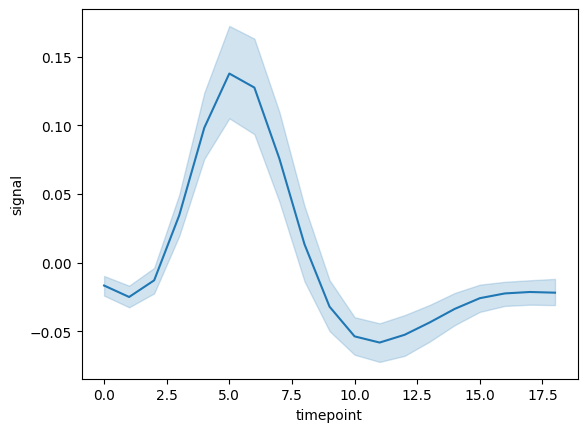

In [93]:
# creating a line chart
sns.lineplot(x="timepoint", y="signal", data=fmri)

Text(0, 0.5, 'Percent Signal Change')

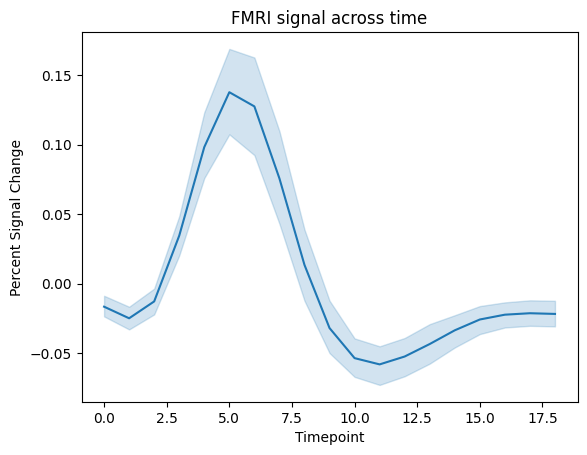

In [94]:
# adding titles and labels
sns.lineplot(x="timepoint", y="signal", data=fmri)

plt.title("FMRI signal across time")
plt.xlabel("Timepoint")
plt.ylabel("Percent Signal Change")

<Axes: xlabel='timepoint', ylabel='signal'>

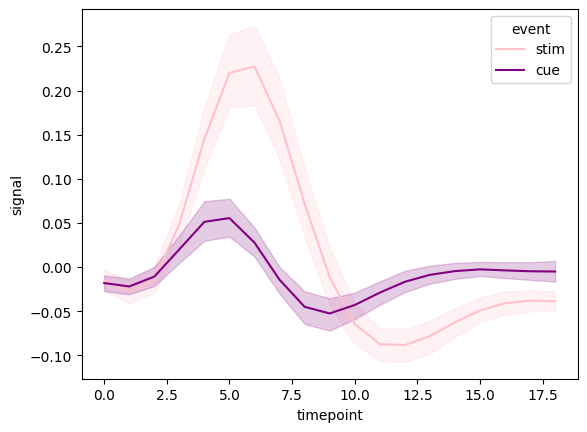

In [95]:
# We can plot multiple Lines with different colours to differentiate
# We can also specify colour palette etc.

sns.lineplot(x="timepoint", y="signal", hue="event", palette=["pink", "purple"], data=fmri)

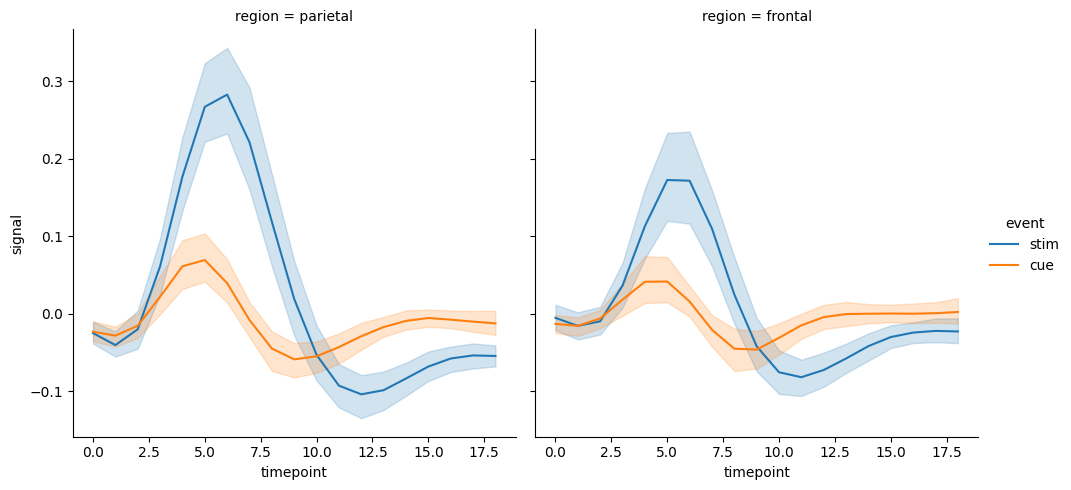

In [96]:
# Relplot - combining lineplot and FacetGrid(Multiplot grid for plottin conditional relationships)
# We can use this to make multiple line charts for comparison
# "col" specify how to split the data into separate charts
# "kind" type of chart, default is "scatter" but we can choose "line"

sns.relplot(x="timepoint", y="signal", col="region", hue="event", kind="line", data=fmri)

# Line Charts: Matplotlib

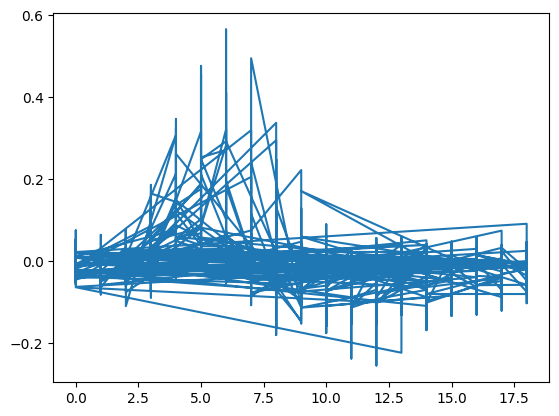

In [97]:
# lets plot the same chart with Matplotlib
# There are multiple signals per timepoint, seaborn does the averaging for us, matplotlib doesnt
plt.plot(fmri.timepoint, fmri.signal)

In [98]:
# Matplotlib Line plot is better for data which we want to see all of on the graph
# Let's make some data to show this
new_df = pd.DataFrame({'years':[2014,2015,2016,2017,2018,2019,2020],
                       'sales':[4800,4900,5000,5700,6500,5000,6700]})
new_df.head()

,years,sales
0,2014,4800
1,2015,4900
2,2016,5000
3,2017,5700
4,2018,6500


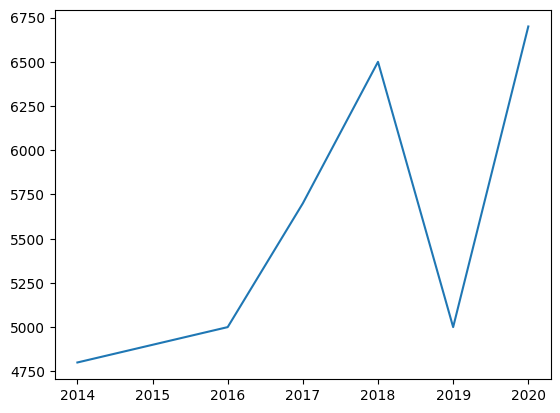

In [99]:
# Now our simple line plot works
plt.plot(new_df.years, new_df.sales)

Text(0, 0.5, 'Sales')

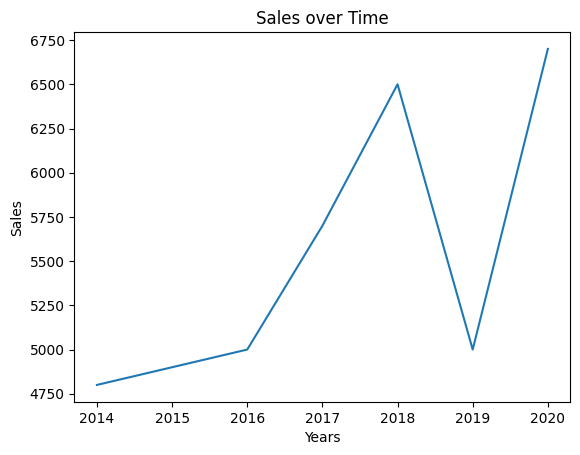

In [100]:
# add label and 
plt.plot(new_df.years, new_df.sales)

plt.title("Sales over Time")
plt.xlabel("Years")
plt.ylabel("Sales")

# Bar Charts: Seaborn

In [101]:
# Lets load a new dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='day', ylabel='total_bill'>

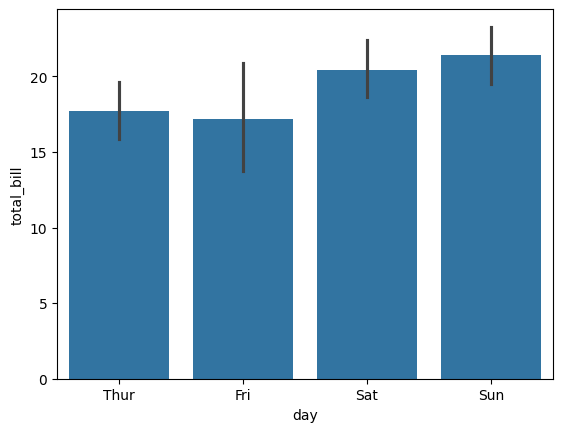

In [102]:
sns.barplot(x="day", y="total_bill", data=tips)

Text(0, 0.5, 'Total Bill')

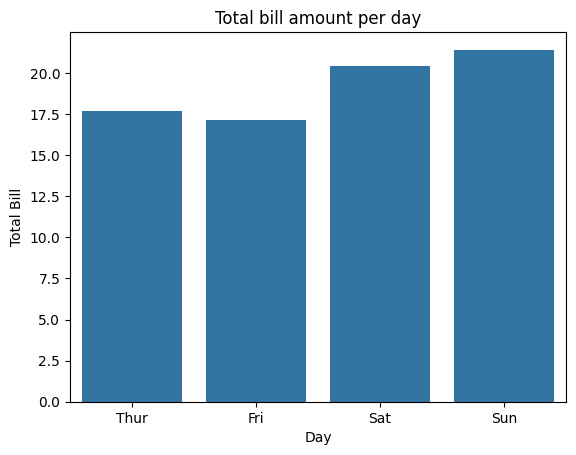

In [103]:
# Adding title and changing labels
# By default, the bar chart will include confidence intervals (now called error bar), we can turn them off
sns.barplot(x="day", y="total_bill", data=tips, errorbar=None)

plt.title("Total bill amount per day")
plt.xlabel("Day")
plt.ylabel("Total Bill")

<Axes: xlabel='total_bill', ylabel='day'>

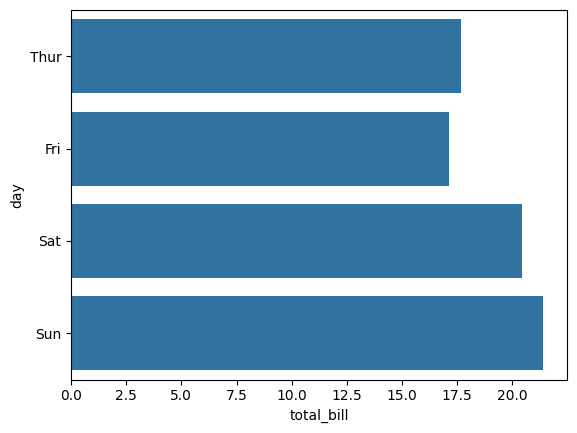

In [104]:
# we can change the orientation
sns.barplot(x="total_bill", y="day", data=tips, errorbar=None)

Text(0, 0.5, 'Total Bill')

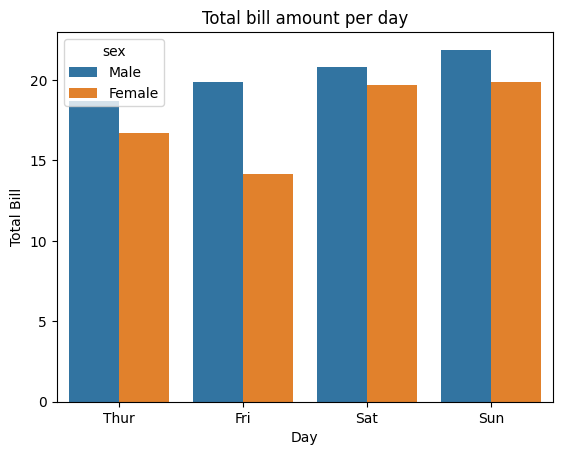

In [105]:
# split the data based on sex
sns.barplot(x="day", y="total_bill", data=tips, hue="sex",errorbar=None)

plt.title("Total bill amount per day")
plt.xlabel("Day")
plt.ylabel("Total Bill")

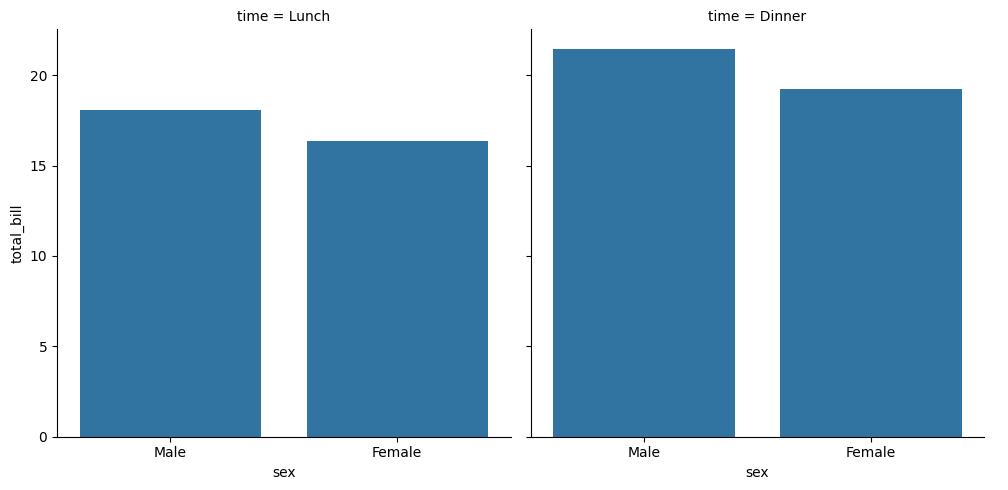

In [106]:
# Catplot - Used for drawing categorical plots on FacetGrid
# We can use these for comparison
# There are many different types: https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(x="sex", y="total_bill", col="time", data=tips, kind="bar", errorbar=None)

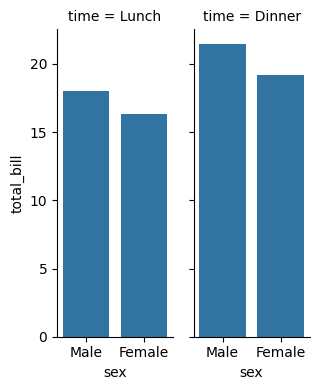

In [107]:
# we change dimesnsions of the graph
# height is in inches
# aspect is * height in width
sns.catplot(x="sex", y="total_bill", col="time", data=tips, kind="bar", errorbar=None, height=4, aspect=.4)

# Barcharts in Matplotlib

<BarContainer object of 244 artists>

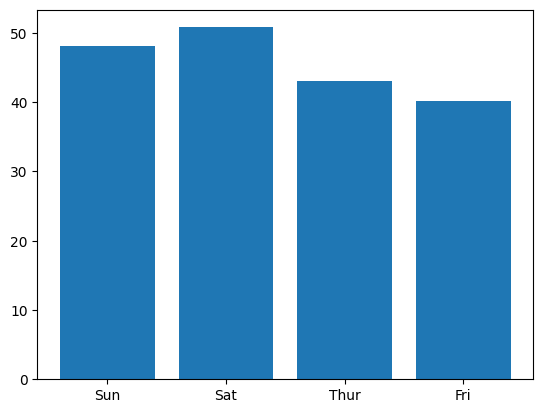

In [108]:
plt.bar(tips.day, tips.total_bill)

Text(0, 0.5, 'Total bill amount')

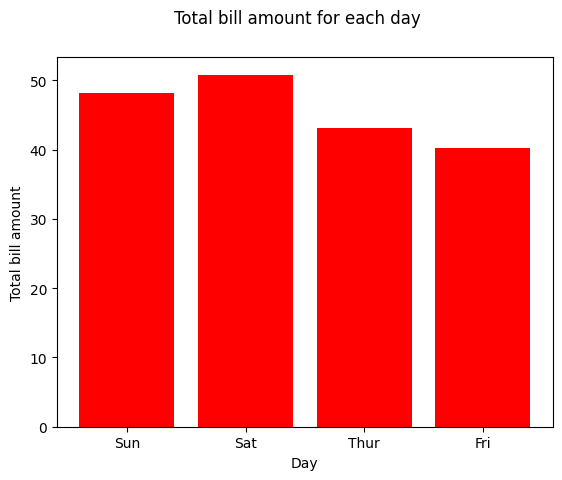

In [109]:
# Customisation
plt.bar(tips.day,tips.total_bill,color='red') 
# changing colour
plt.suptitle("Total bill amount for each day") 
# Title for the chart
plt.xlabel("Day")
plt.ylabel("Total bill amount")

# Stacked Bar Chart: Matplotlib

In [110]:
# more info on tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [111]:
# To make it easier to plot the graph, we need to play around with our data:
# First we split it up by male and female
male = tips[tips['sex'] == 'Male']
female = tips[tips['sex'] == 'Female']

# Then we group by day so that we can easily get the mean for each day
mday = male.groupby('day').mean(numeric_only=True)
fday = female.groupby('day').mean(numeric_only=True)

# To be able to find the proportions easily and have everything in one place, we will merge the two DataFrames
totals = mday.merge(fday, right_index=True, left_index=True)

# Creating a total column for tips 
totals['total'] = totals['tip_x'] + totals['tip_y']

# Calculating a percentage total for male and female for each day
totals['prop_mal'] = np.true_divide(totals['tip_x'], totals['total']) * 100
totals['prop_fem'] = np.true_divide(totals['tip_y'], totals['total']) * 100

# result
totals.head()

C:\Users\Noor\AppData\Local\Temp\ipykernel_36824\1479068563.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mday = male.groupby('day').mean(numeric_only=True)
C:\Users\Noor\AppData\Local\Temp\ipykernel_36824\1479068563.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fday = female.groupby('day').mean(numeric_only=True)


,total_bill_x,tip_x,size_x,total_bill_y,tip_y,size_y,total,prop_mal,prop_fem
day,,,,,,,,,
Thur,18.714667,2.980333,2.433333,16.715312,2.575625,2.468750,5.555958,53.642111,46.357889
Fri,19.857000,2.693000,2.100000,14.145556,2.781111,2.111111,5.474111,49.195202,50.804798
Sat,20.802542,3.083898,2.644068,19.680357,2.801786,2.250000,5.885684,52.396600,47.603400
Sun,21.887241,3.220345,2.810345,19.872222,3.367222,2.944444,6.587567,48.885192,51.114808


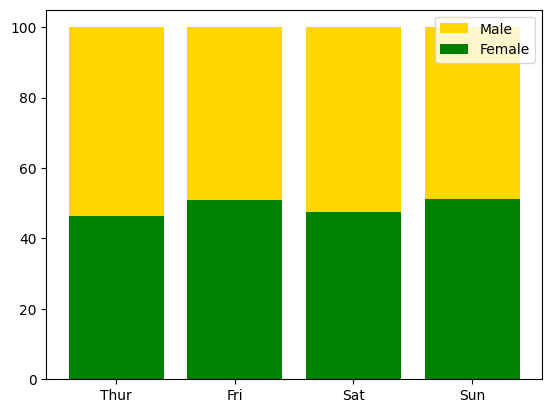

In [112]:
# Plotting the stacked bar chart
# The way this is differet to a normal bar chart is that we can specify 'bottom' 
# This will tell matplotlib where the bar should start from
plt.bar(totals.index,totals.prop_mal, label='Male',color='gold',bottom=totals.prop_fem)
plt.bar(totals.index,totals.prop_fem, label='Female',color='green')
plt.legend()

# Histograms: Matplotlib

In [113]:
# lets create some random data
# randn - retuen a sample from a standard normal distribution
data = np.random.randn(100)
data

array([ 0.4307941 ,  2.11632671, -0.20488571, -1.9195544 , -0.38719066,
       -1.14759258,  1.28120071,  1.22392804,  0.76020761, -1.56209539,
        1.34624785,  0.8910917 , -1.37604413,  0.30804678, -1.17128905,
       -0.23401121, -0.19814547, -0.27342816, -0.09308654,  0.27089442,
       -0.18880056,  1.95367904, -2.27857533, -0.43239597, -0.59680577,
       -1.19600857,  0.49309175, -1.37097652,  0.59008552, -0.19550328,
       -0.0718407 ,  0.5885027 ,  0.36771079,  0.05202913, -0.13128104,
        0.13555864,  0.49771284,  0.35619653,  2.43267982, -1.22428667,
       -0.38017969,  2.68170748, -1.11816869, -0.29516361,  0.50844045,
       -1.75026624,  0.91817725,  0.82061387,  0.26045845, -0.91224099,
       -0.54339447, -1.16769041,  1.46894549,  1.56438652, -0.33182958,
       -1.20011717, -0.18431547, -2.25541658, -0.22935601, -0.41203638,
        1.76476947,  1.46235276, -0.51926914,  0.37731275,  0.31561234,
        0.12201404, -0.15450007, -0.35067587, -0.48712724,  0.08

(array([ 4.,  7., 10., 12., 23., 21., 10.,  7.,  4.,  2.]),
 array([-2.35520943, -1.85151774, -1.34782605, -0.84413436, -0.34044267,
         0.16324902,  0.66694072,  1.17063241,  1.6743241 ,  2.17801579,
         2.68170748]),
 <BarContainer object of 10 artists>)

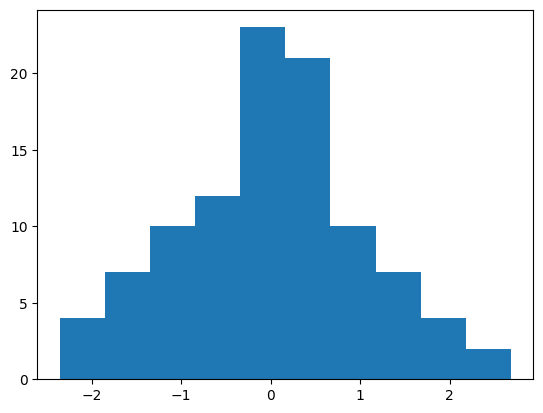

In [114]:
plt.hist(data)

(array([ 3.,  1.,  1.,  6.,  8.,  2.,  3.,  9., 16.,  7., 12.,  9.,  8.,
         2.,  4.,  3.,  1.,  3.,  0.,  2.]),
 array([-2.35520943, -2.10336358, -1.85151774, -1.59967189, -1.34782605,
        -1.0959802 , -0.84413436, -0.59228851, -0.34044267, -0.08859682,
         0.16324902,  0.41509487,  0.66694072,  0.91878656,  1.17063241,
         1.42247825,  1.6743241 ,  1.92616994,  2.17801579,  2.42986163,
         2.68170748]),
 <BarContainer object of 20 artists>)

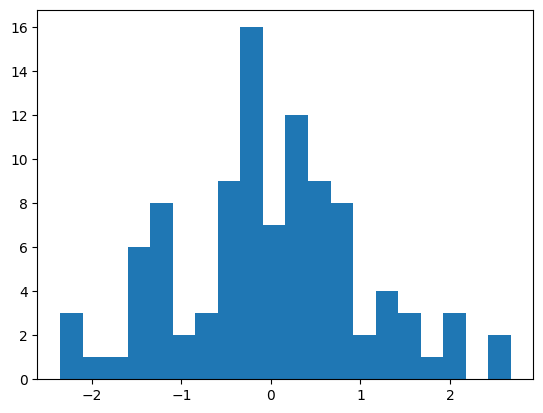

In [115]:
# we can change the number of bins
plt.hist(data, bins=20)

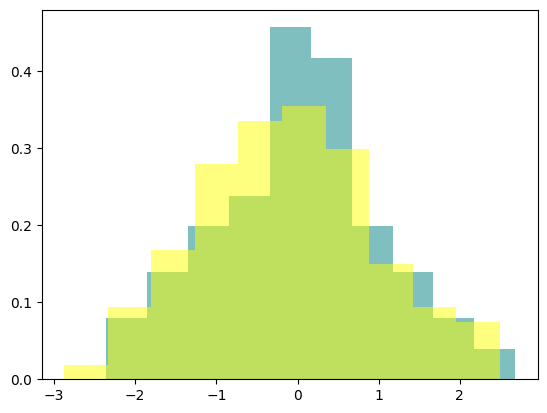

In [116]:
# Creating an overlapping density histogram
# Previously, we had counts, now we will look at density
# Changing alpha changes the opacity, allowing us to see the graphs overlapping 
data2 = np.random.randn(100)

plt.hist(data,color='teal',alpha=0.5,density=True)
plt.hist(data2,color='yellow',alpha=0.5,density=True)
plt.show()

# Histogram Plot: Seaborn

<Axes: ylabel='Count'>

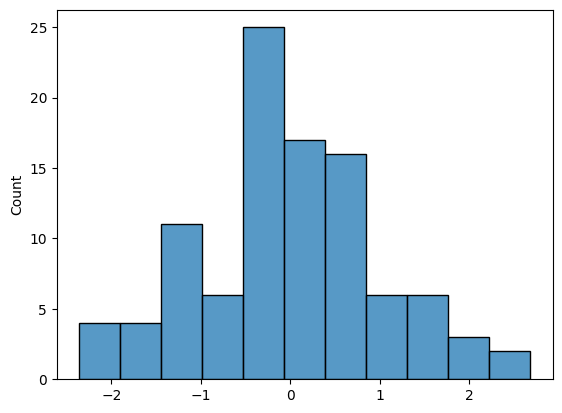

In [117]:
sns.histplot(data)

# Jointplot: Seaborn

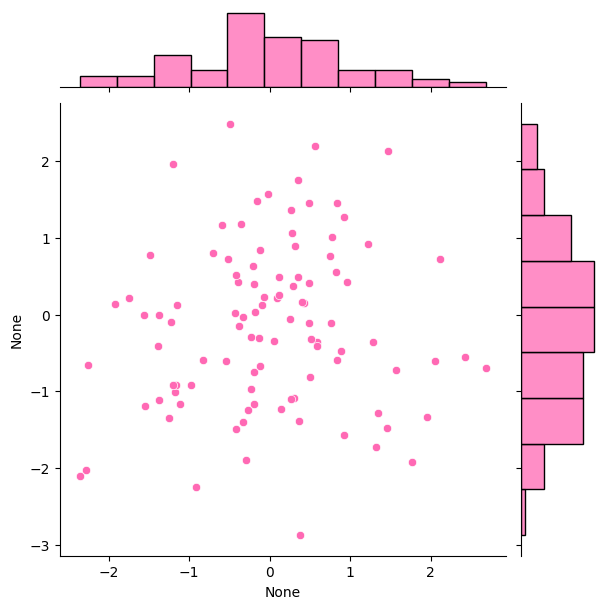

In [118]:
# This creates a plot of two variables with bivariate graphs and univariate graphs
# basically shows a scatter plot for both variables and a histogram for each
sns.jointplot(x=data, y=data2, color="hotpink")

# Plotting Data

In [119]:
# load the iris dataset
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


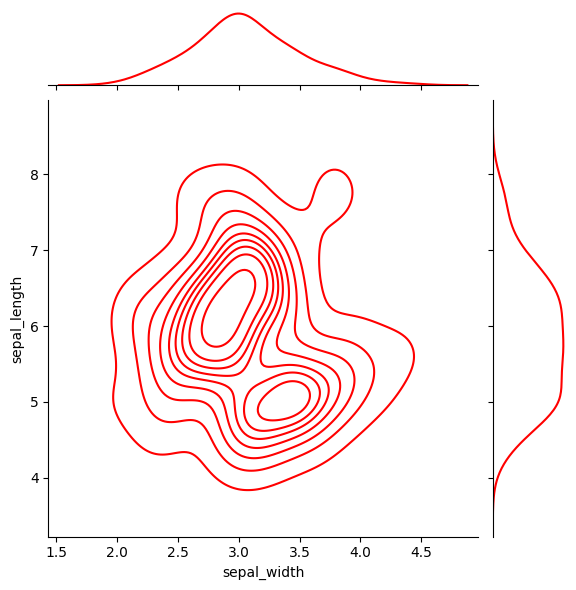

In [120]:
# lets customise the jointplot some more
# scatter, reg, resid, kde, hex
# KDE = Kernel Density Estimate plot
sns.jointplot(x=iris["sepal_width"], y=iris["sepal_length"], color="red", kind="kde")

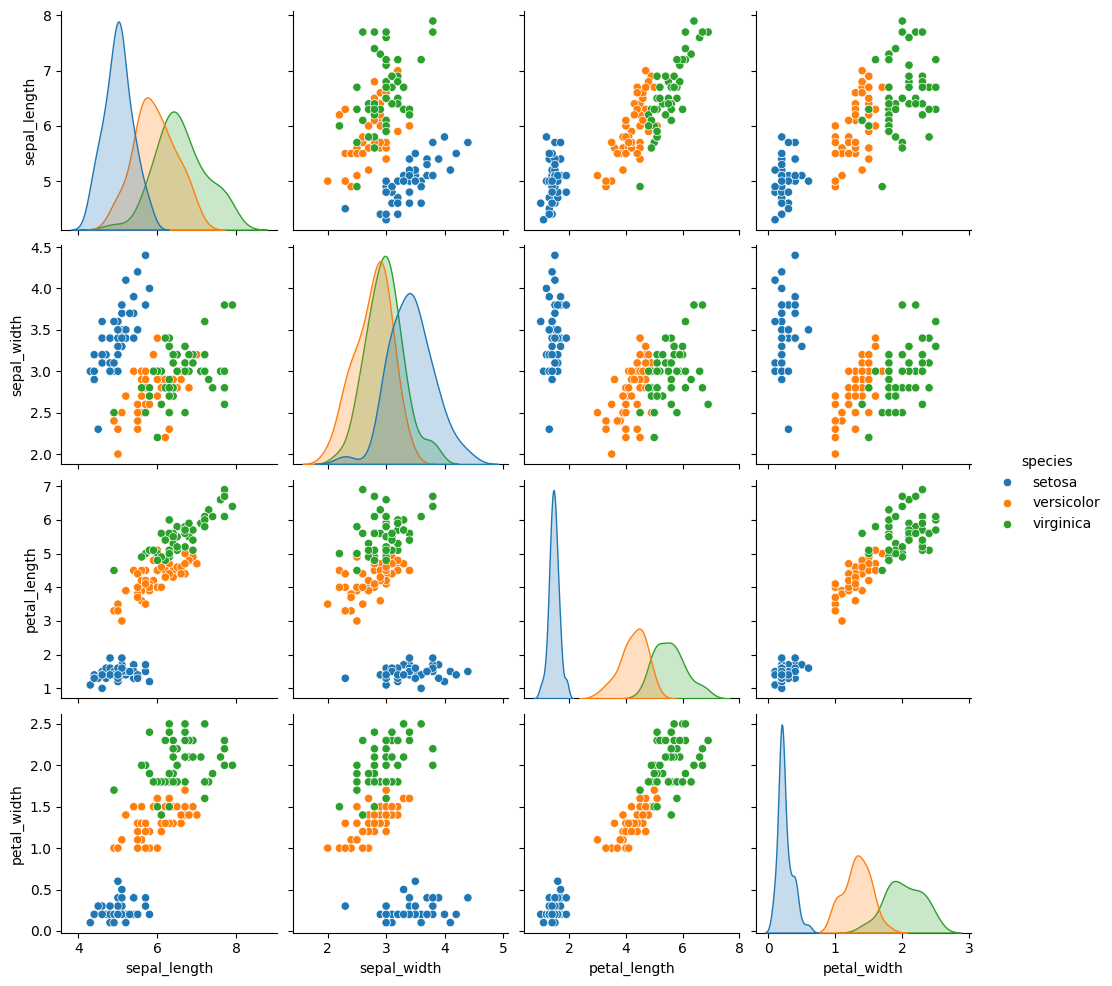

In [121]:
# lets go into more detail
# pairplots
# if we add the parameter "hue" each species will be given a different color
sns.pairplot(iris, hue="species")

In [122]:
# Looking in more detail - Scatterplot
# We are adding hue for species so that each one will have a different colour
# We can also use set to add a title and change the axis labels
sns.relplot(data=iris,x='petal_length',y='petal_width',hue="species"
            #    hue=iris.species.tolist()    <--- This gets past an error with matplotlib 3.3.1!)
            .set(title="Scatterplot",xlabel='Petal Length',ylabel='Petal Width')

_IncompleteInputError: incomplete input (753613415.py, line 6)

In [ ]:
# the same in matplotlib is not as good
plt.scatter(iris['petal_length'], iris['petal_width'])

In [ ]:
# Producing the same scatterplot in matplotlib - we need to do this differently

# Creating separate DataFrames, ready to plot
vers = iris[iris['species'] == 'versicolor']
setosa = iris[iris['species' ] == 'setosa']
virg = iris[iris['species'] == 'virginica']

# Plotting each DataFrame separately, and showing them together on one plot
# We can set each one to a different colour
plt.scatter(vers.petal_length,vers.petal_width, c='orange')
plt.scatter(setosa.petal_length,setosa.petal_width, c='blue')
plt.scatter(virg.petal_length, virg.petal_width, c='green')

# Adding titles
plt.suptitle("Scatterplot")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Adding Legend
plt.legend(labels=['versicolor','Setosa','Virginica'])

# Linear Model Plot

In [ ]:
# This produces a scatterplot and will try to show the variable relationships + lines of best fit
sns.lmplot(data=iris, x="petal_length", y="petal_width", hue="species")

In [ ]:
# if we take away the hue we get the 
sns.lmplot(data=iris, x="petal_length", y="petal_width")

# Heatmap: Seaborn

In [ ]:
# bring in flights dataset
flights = sns.load_dataset("flights")
flights.head()

In [ ]:
sns.heatmap(flights) 
# wont work because the data is in long format

In [ ]:
# we need wide format for heatmaps, so we need to pivot
fp = flights.pivot(index="year", columns="month", values="passengers")
fp.head()

In [ ]:
# now that its in wide formart we can make a heatmap
sns.heatmap(fp)

In [ ]:
# changing the color and adding detail
sns.heatmap(fp, annot=True, fmt="d", cmap="summer")

# Treemap

In [ ]:
# If you want treemaps, import squarify

# Pie charts and Donuts: Matplotlib

In [ ]:
# create data
size_of_group = [15, 10, 3, 30, 12]

# create pie chart
plt.pie(size_of_group)
plt.show() # shows just chart no extra text

In [ ]:
# How about a donut?
plt.pie(size_of_group)
 
# Adding a white circle to the middle of the pie chart
circle = plt.Circle((0,0), 0.7, color="white")
 
# gcf() - get current figure (i.e figure we created
fig = plt.gcf()
 
# add the white circle
fig.gca().add_artist(circle)